Unique no. of Countries/regions: 220


>----------- Problem 2

ds          gadm_name              business_vertical           
2020-03-01  Akrotiri and Dhekelia  All                             1
2021-12-30  Germany                Local Events                    1
            Georgia                Business & Utility Services     1
                                   Grocery & Convenience Stores    1
                                   Home Services                   1
                                                                  ..
2021-01-29  Northern Cyprus        All                             1
                                   Business & Utility Services     1
                                   Grocery & Convenience Stores    1
                                   Home Services                   1
2022-11-29  Åland                  Travel                          1
Name: count, Length: 2396549, dtype: int64


>----------- Count Dates by Geo Area

gadm_name              business

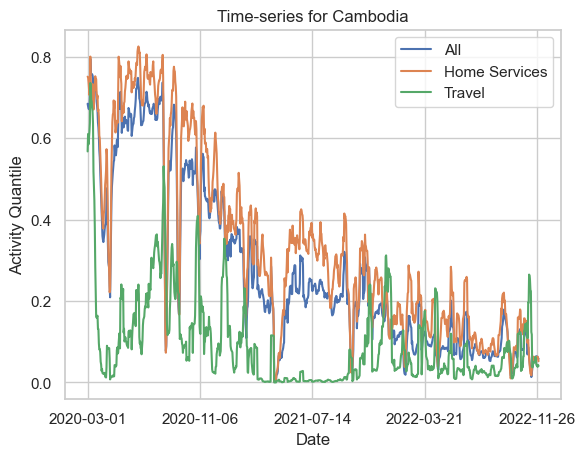

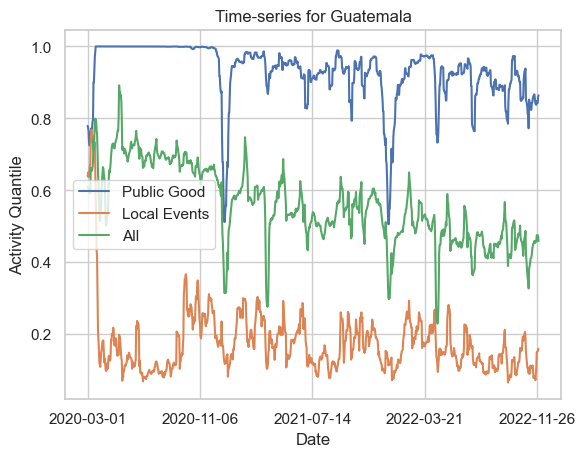

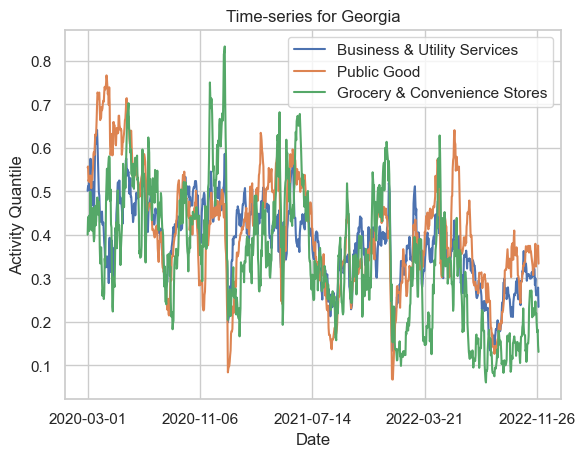

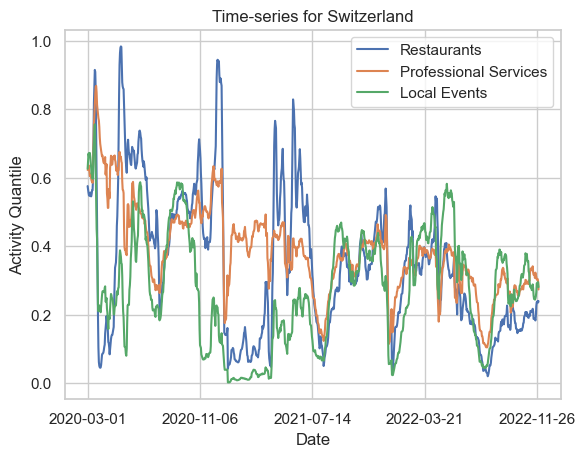

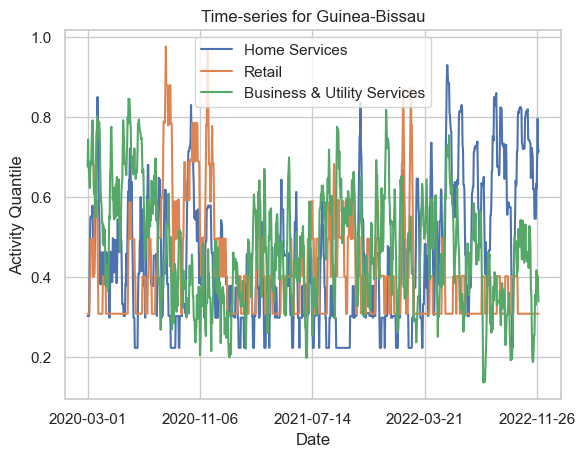



>----------- Problem 5


Average activity on weekdays: 0.43338454978230495
Average activity on weekends: 0.4334068750021856


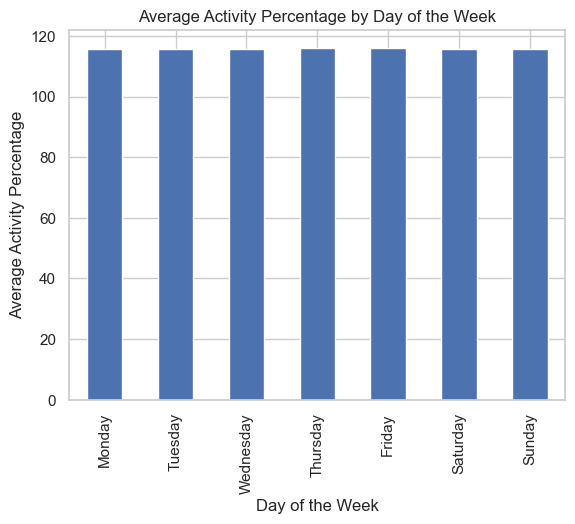

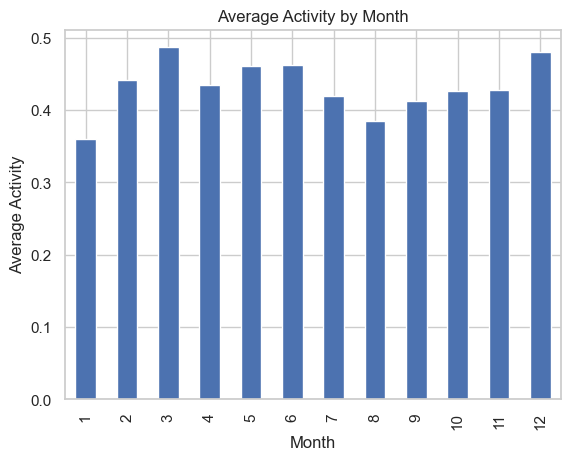

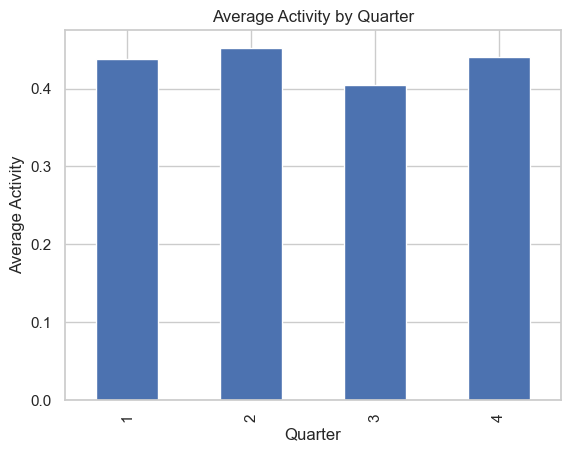



>----------- Additional Analysis 2: Pair Plot



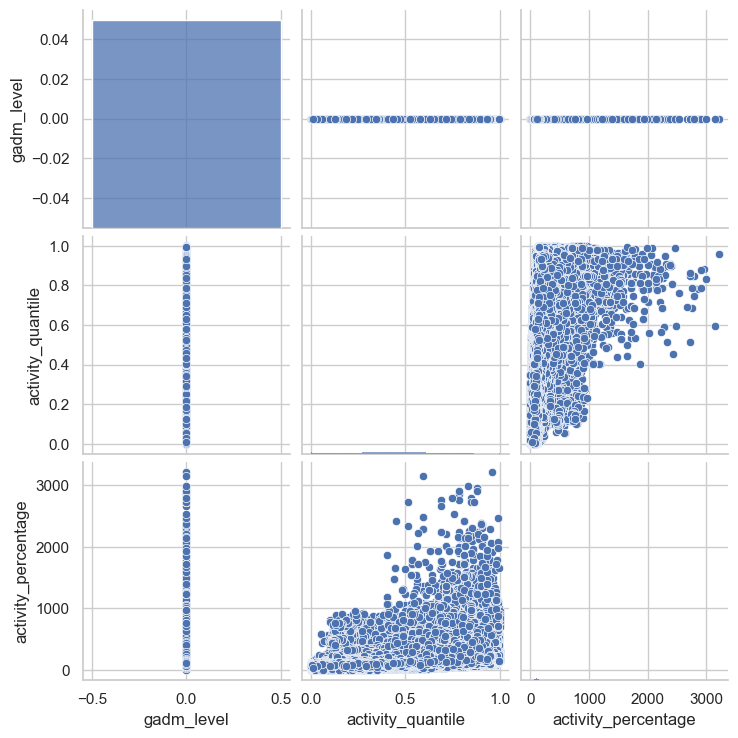



>----------- Problem 6



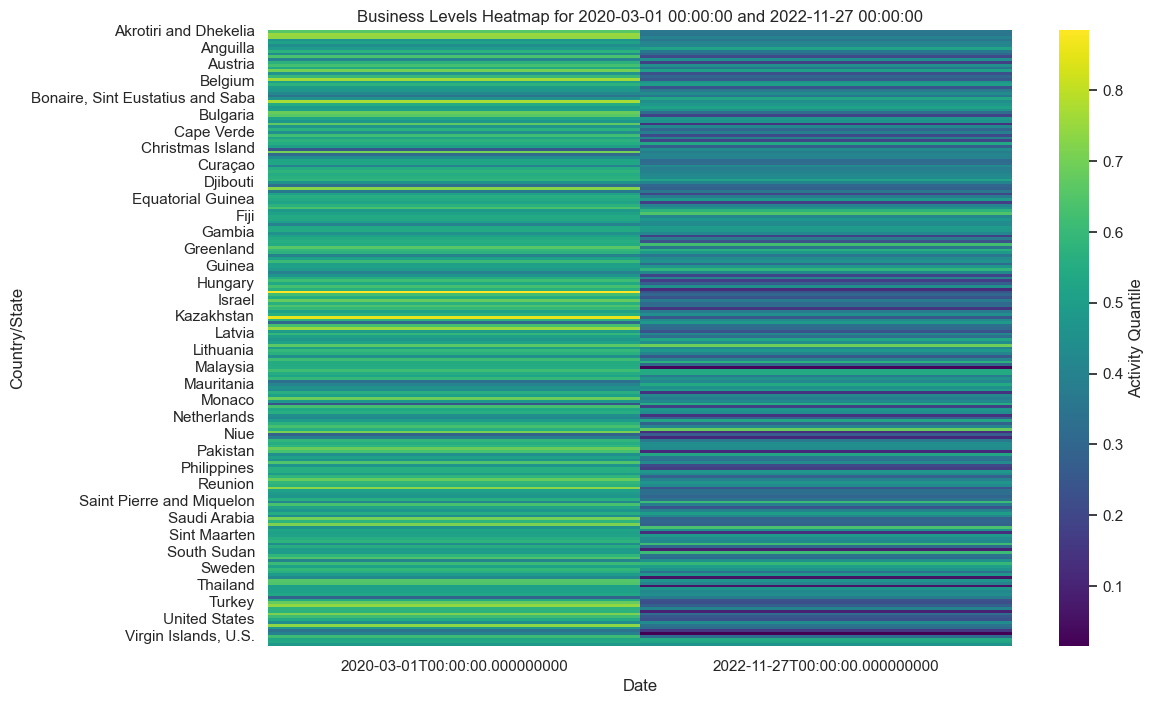



>----------- Part 2



>----------- Problem 1



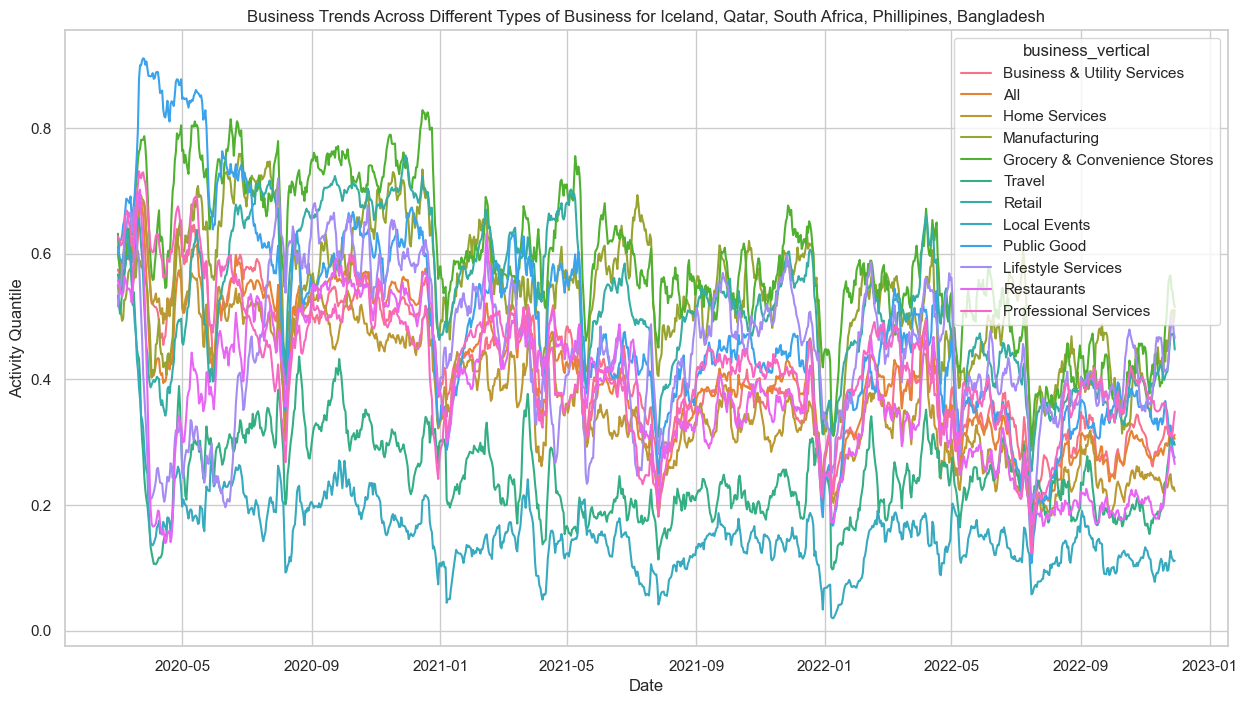



>----------- Additional Details



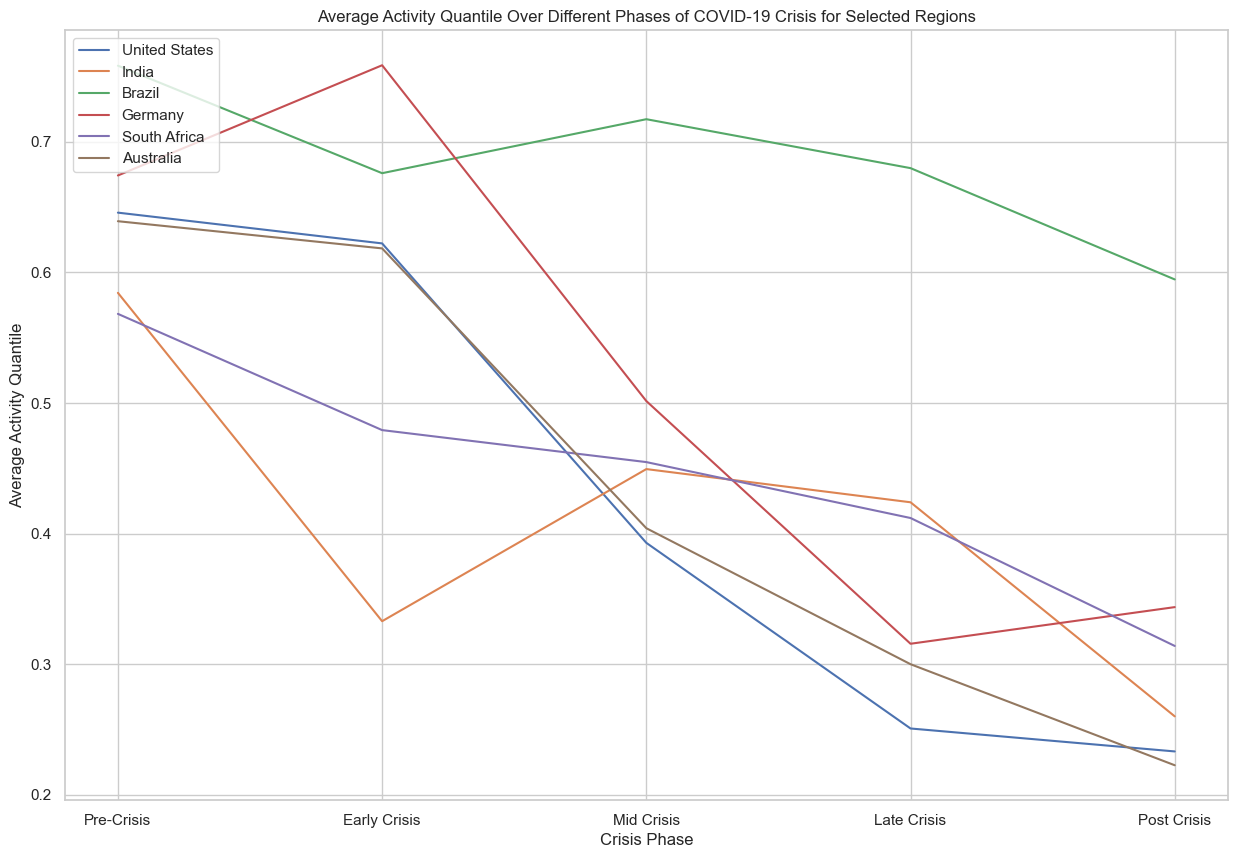

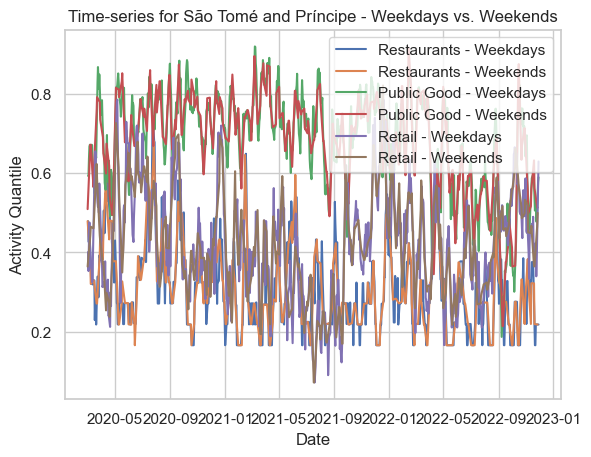

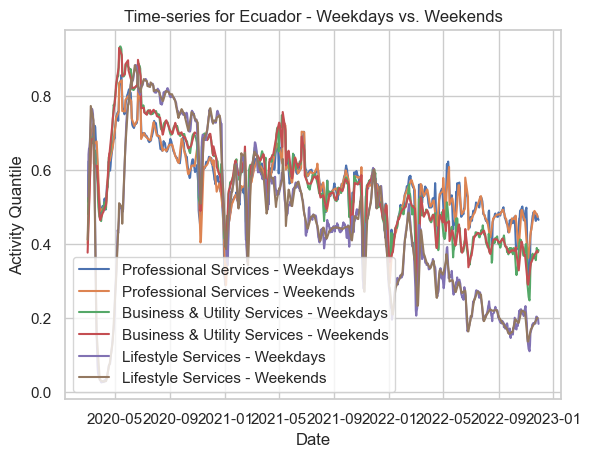

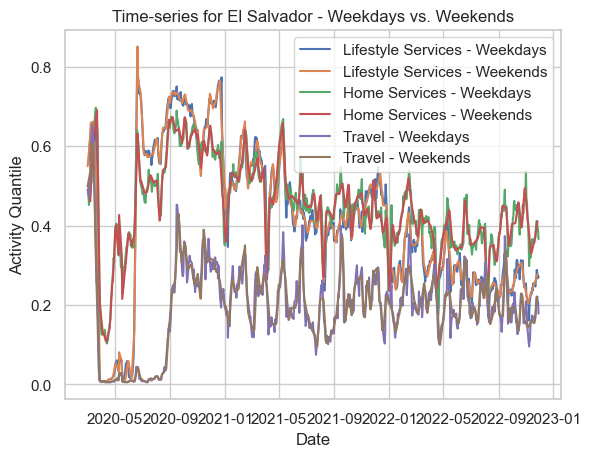

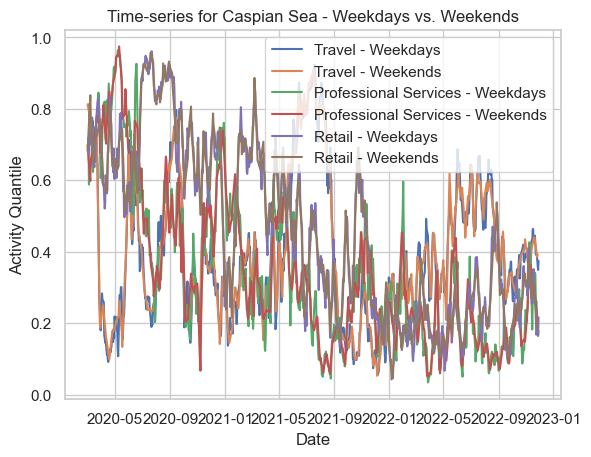

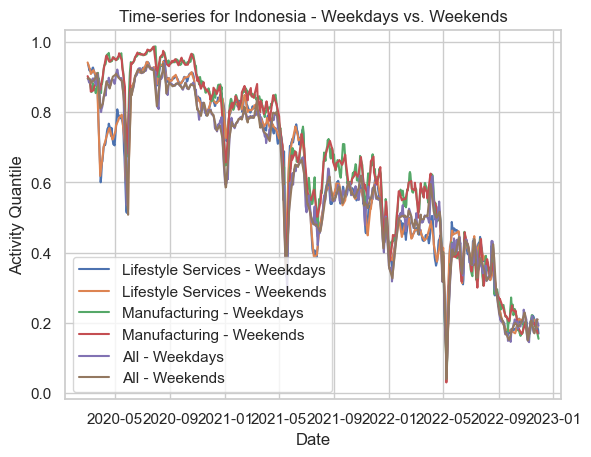



>----------- Problem 4

(Please see graphs)


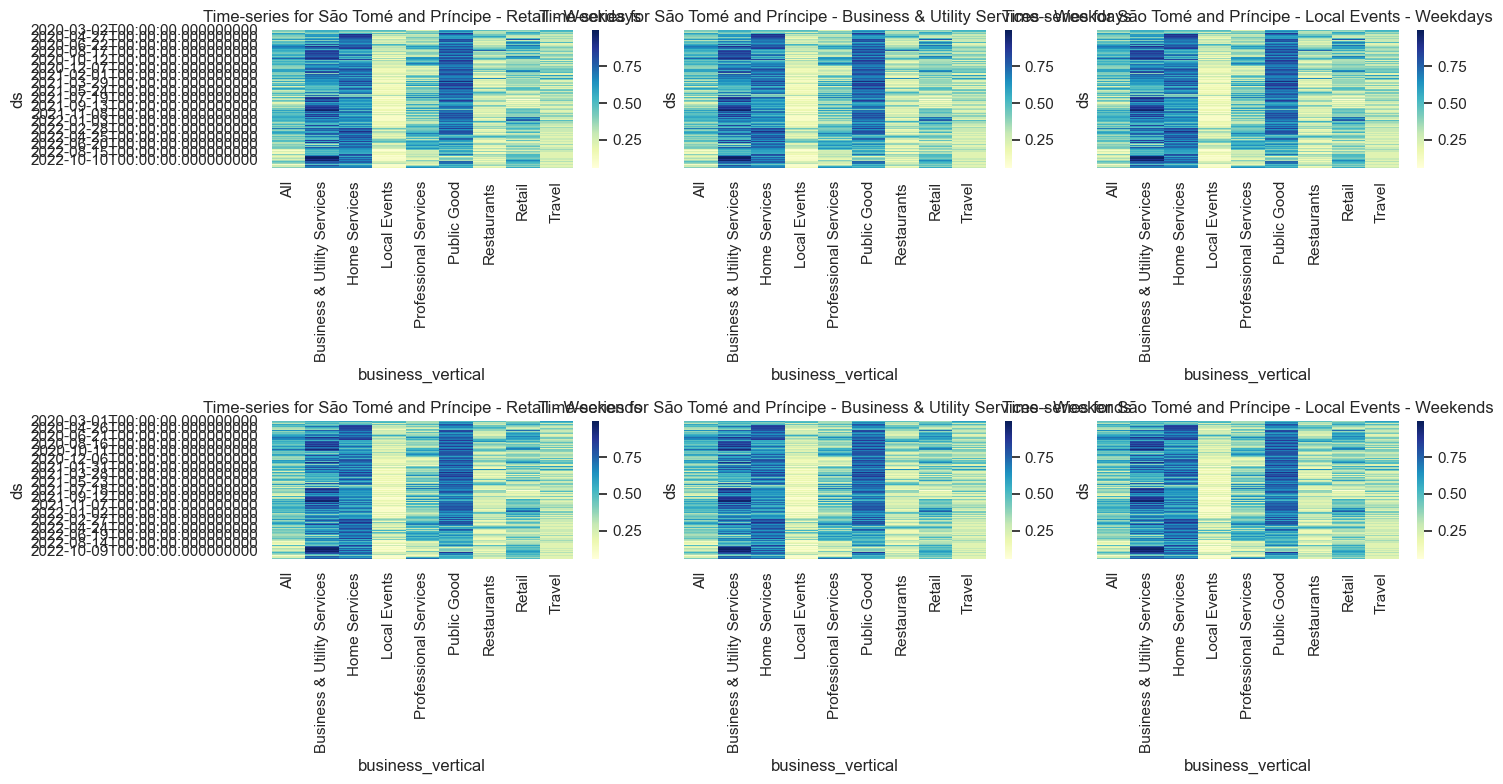

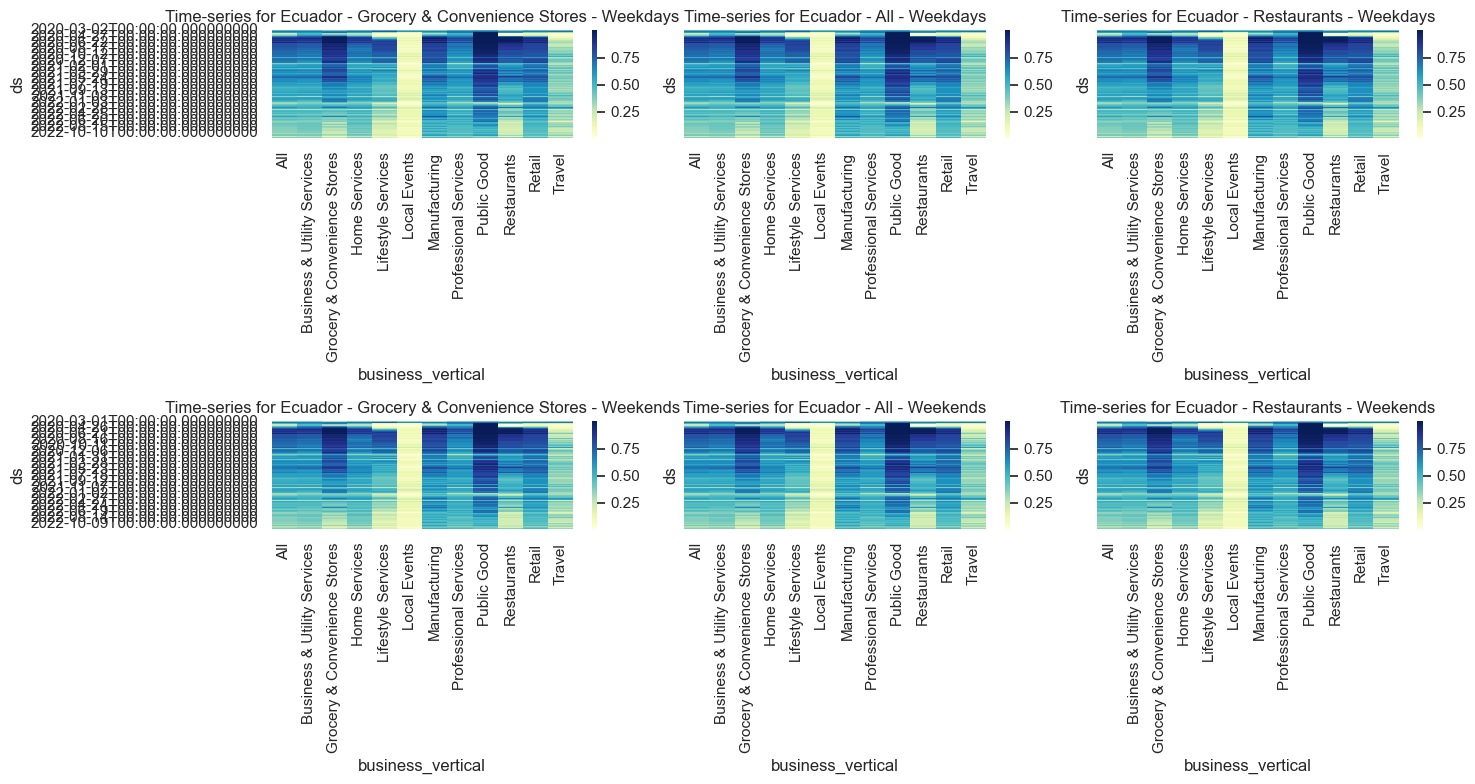

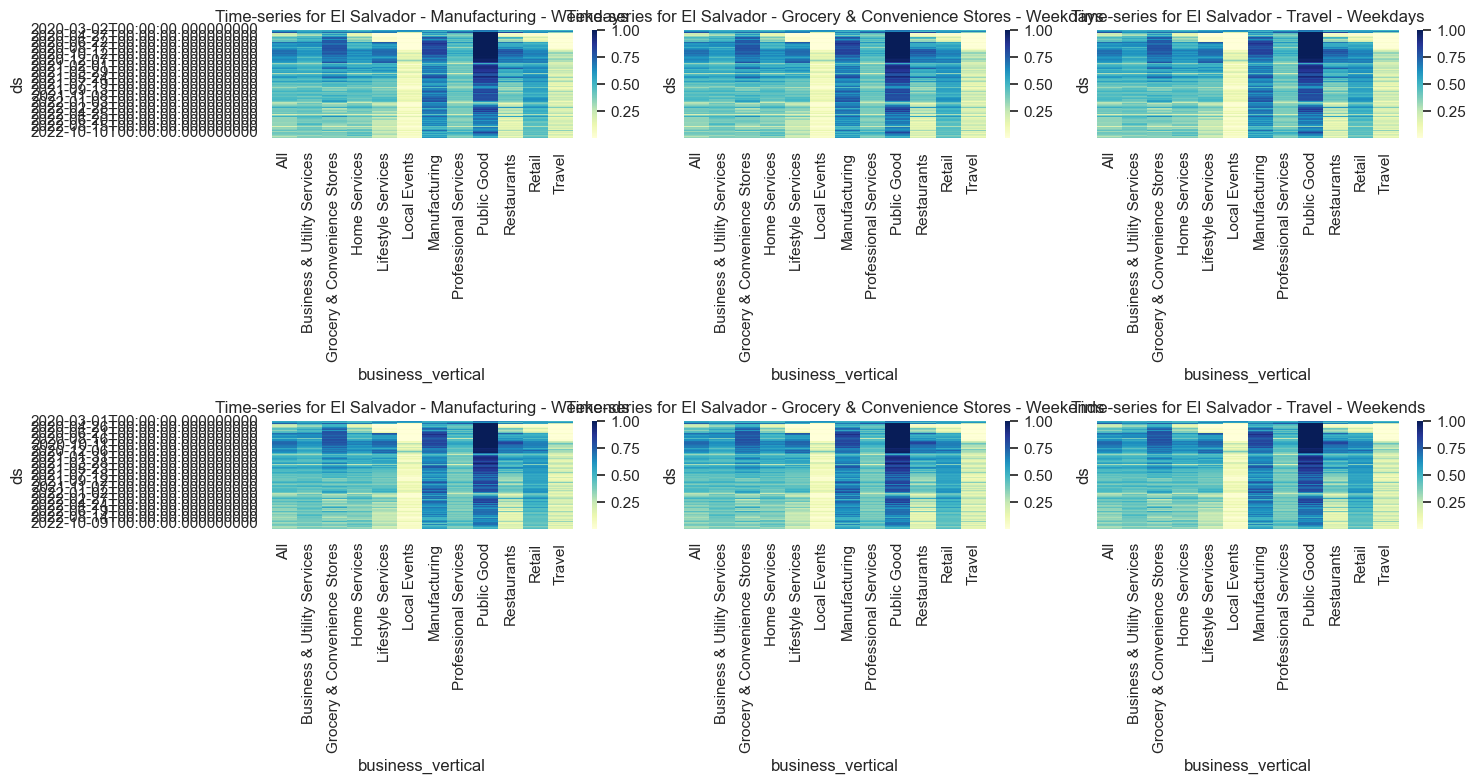

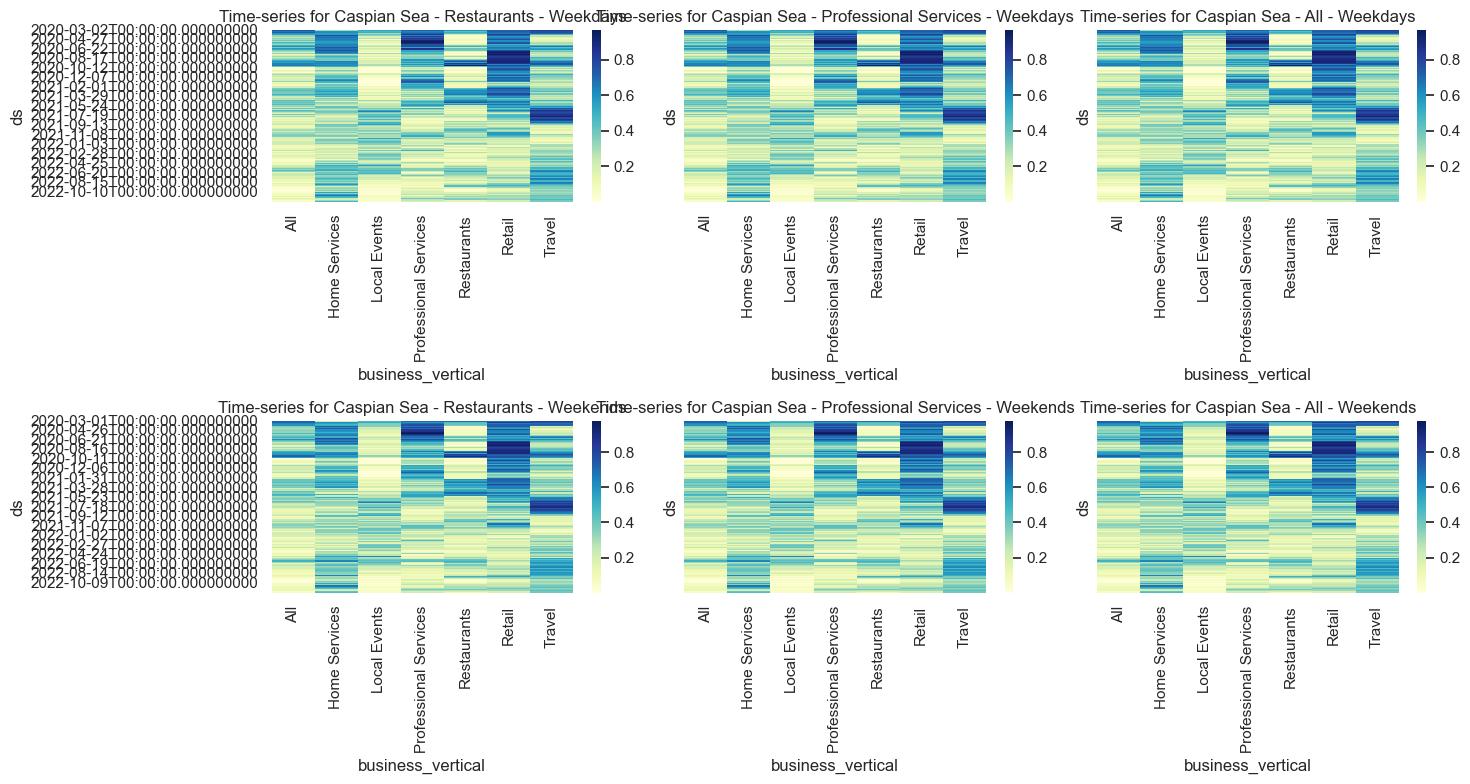

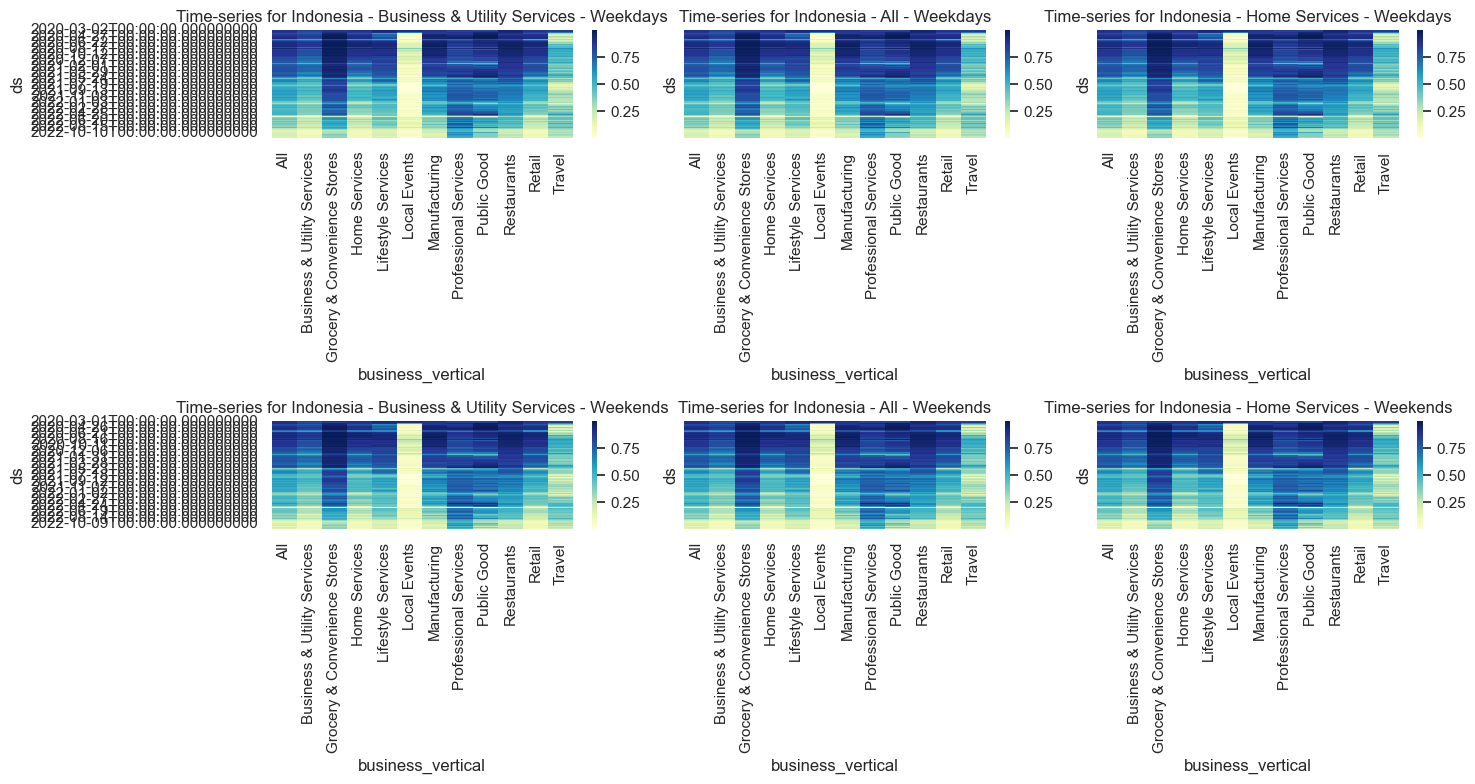

In [7]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import random

def load_data(path):
    ''' Load all files from folder into one dataframe '''
    filepaths = glob.glob(path)

    if not filepaths:
        raise ValueError(f'No CSV files found in the specified folder: {path}')

    df_l = []

    for filepath in filepaths:
        sub_df = pd.read_csv(filepath)
        df_l.append(sub_df)

    df = pd.concat(df_l)

    # Remove NaN values in rows and columns
    df = df.dropna(how='all', axis=0)
    df = df.dropna(how='all', axis=1)

    df = df.sort_values(['ds', 'gadm_name'])
    return df

def count_dates_by_geo_area(df):
    ''' Count the total number of dates available for each country/state '''
    dates_count = df.groupby(['gadm_name', 'business_vertical'])['ds'].nunique()
    return dates_count

def plot_line(df, ax, country, sector):
    ''' Plot the time-series for the business '''
    title = f'Time-series for {country}'
    label_dict = {
        'ds': 'Date',
        'activity_quantile': 'Activity Quantile'
    }
    x_label = 'ds'
    y_label = 'activity_quantile'

    ax.plot(df[x_label].to_list(), df[y_label].to_list(), label=sector)
    
    ax.set_title(title)
    ax.set_xlabel(label_dict[x_label])
    ax.set_ylabel(label_dict[y_label])

    nticks = 5
    step = int((df.shape[0]-1) / (nticks-1))
    ax.set_xticks(range(0, df.shape[0], step))
    return ax

def plot_bar(data, title, xlabel, ylabel):
    ''' Plot bar chart '''
    data.plot(kind='bar', title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def visualize_days_heatmap(df, day1, day2):
    # Convert 'ds' column to datetime format
    df['ds'] = pd.to_datetime(df['ds'])

    # Filter data for the selected days
    df_selected_days = df[df['ds'].isin([day1, day2])]

    # Check if df_selected_days is not empty
    if df_selected_days.empty:
        print("No data available for the selected days.")
        return

    # Pivot the dataframe for heatmap visualization
    heatmap_data = df_selected_days.pivot_table(index='gadm_name', columns='ds', values='activity_quantile', aggfunc='mean')

    # Use seaborn heatmap with a colormap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Activity Quantile'})

    plt.title(f'Business Levels Heatmap for {day1} and {day2}')
    plt.xlabel('Date')
    plt.ylabel('Country/State')

    plt.show()

def main():
    # Define folderpath and read in all csv files in the folder
    folderpath = '/Users/delton/Desktop/Intro_To_DS/Coursework/Dataset 1/Part1/'
    extension = '*.csv'
    path = folderpath + extension

    try:
        df = load_data(path)
    except ValueError as e:
        print(f'Error loading data: {e}')
        return

    # Problem 1
    no_regions = len(df['gadm_name'].dropna().unique())
    print(f'Unique no. of Countries/regions: {no_regions}')

    # Problem 2
    print('\n\n>----------- Problem 2\n')
    freq = df[['ds', 'gadm_name', 'business_vertical']].value_counts()
    print(freq)

    print('\n\n>----------- Count Dates by Geo Area\n')
    dates_count = count_dates_by_geo_area(df)
    print(dates_count)

    # Describe missing values and duplicates
    missing_values = df.isnull().sum()
    duplicates = df.duplicated().sum()

    print('\n>----------- Missing Values\n')
    print(missing_values)

    print('\n>----------- Duplicates\n')
    print(f'Number of duplicate rows: {duplicates}')

    # Handle anomalies 
    # For example, drop duplicates or fill missing values based on the requirement
    # df.drop_duplicates(inplace=True) This line of code removes all duplicate rows,
    # ensuring that each row in the DataFrame is unique.
    # df.fillna(0, inplace=True)  # This line of code replaces all NaN values in the DataFrame with 0.
    # However, the choice of the filling value depends on the nature of the data and the specific
    # requirements of the analysis.
    # Problem 3
    print('\n\n>----------- Problem 3\n')

    # Problem 4
    print('\n\n>----------- Problem 4\n')
    print('(Please see graphs)')

    # Randomly select 5 countries
    countries = df['gadm_name'].dropna().drop_duplicates()
    rand_five_countries = countries.sample(5)

    # Loop over unique countries
    for country in rand_five_countries:
        country_df = df[df['gadm_name'] == country]
        unique_sectors = country_df['business_vertical'].dropna().drop_duplicates()

        # Sample without replacement if there are enough unique sectors, otherwise, sample with replacement
        sample_size = min(len(unique_sectors), 3)
        rand_sectors = unique_sectors.sample(sample_size, replace=sample_size < 3)

        fig, ax = plt.subplots()
        for sector in rand_sectors:
            sector_df = country_df[country_df['business_vertical'] == sector]
            ax = plot_line(sector_df, ax, country, sector)

        ax.legend()
        plt.show()  # Display each figure

    # Problem 5
    print('\n\n>----------- Problem 5\n')
    df['ds'] = pd.to_datetime(df['ds'])
    df['weekday'] = df['ds'].dt.dayofweek
    df['is_weekend'] = df['weekday'].isin([5, 6])

    average_activity_weekday = df.loc[~df['is_weekend'], 'activity_quantile'].mean()
    average_activity_weekend = df.loc[df['is_weekend'], 'activity_quantile'].mean()

    print(f'\nAverage activity on weekdays: {average_activity_weekday}')
    print(f'Average activity on weekends: {average_activity_weekend}')

    # Additional Analysis 1: Seasonal Patterns
    # Convert 'ds' to a datetime column to extract the day of the week
    df['ds'] = pd.to_datetime(df['ds'])
    df['day_of_week'] = df['ds'].dt.day_name()

    # Group by day of the week and calculate the mean activity
    weekly_activity = df.groupby('day_of_week')['activity_percentage'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])

    # Plot the weekly activity
    weekly_activity.plot(kind='bar')
    plt.title('Average Activity Percentage by Day of the Week')
    plt.ylabel('Average Activity Percentage')
    plt.xlabel('Day of the Week')
    plt.show()

    # Group by business_vertical and gadm0_name to compare different sectors and countries
    sector_country_activity = df.groupby(['business_vertical', 'gadm0_name'])['activity_percentage'].mean()

    # For anomaly detection, calculate z-scores or use IQR to find outliers
    # This is a simplistic example, and outlier detection can be more complex
    activity_z_scores = (df['activity_percentage'] - df['activity_percentage'].mean()) / df['activity_percentage'].std()
    outliers = df[abs(activity_z_scores) > 3]  # Assuming a z-score threshold of 3 for outliers

    # Extract month and quarter information
    df['month'] = df['ds'].dt.month
    df['quarter'] = df['ds'].dt.quarter

    # Plot average activity by month
    avg_activity_by_month = df.groupby('month')['activity_quantile'].mean()
    plot_bar(avg_activity_by_month, 'Average Activity by Month', 'Month', 'Average Activity')

    # Plot average activity by quarter
    avg_activity_by_quarter = df.groupby('quarter')['activity_quantile'].mean()
    plot_bar(avg_activity_by_quarter, 'Average Activity by Quarter', 'Quarter', 'Average Activity')

    # Additional Analysis 2: Pair Plot for Entire Dataset
    print('\n\n>----------- Additional Analysis 2: Pair Plot\n')
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    sns.pairplot(df[numeric_columns])
    plt.show()

    # Problem 6
    print('\n\n>----------- Problem 6\n')
    # Visualize two specific days with a heatmap
    selected_day1 = pd.to_datetime('2020-03-01')
    selected_day2 = pd.to_datetime('2022-11-27')

    visualize_days_heatmap(df, selected_day1, selected_day2)
    
    #Part2 #Problem1
    print('\n\n>----------- Part 2\n')
    print('\n\n>----------- Problem 1\n')
    # Choose 5-6 different countries
    selected_countries = ['Iceland', 'Qatar', 'South Africa', 'Phillipines', 'Bangladesh',]

    # Filter data for the selected countries
    df_selected_countries = df[df['gadm_name'].isin(selected_countries)]

    # Identify changes in business trends across different types of business
    plt.figure(figsize=(15, 8))
    sns.set(style="whitegrid")

    # Adjust the columns in hue based on your dataset columns representing business types
    hue_column = 'business_vertical'

    # Plot the business trends using a lineplot
    sns.lineplot(x='ds', y='activity_quantile', hue=hue_column, data=df_selected_countries, errorbar=None)

    plt.title('Business Trends Across Different Types of Business for Iceland, Qatar, South Africa, Phillipines, Bangladesh')
    plt.xlabel('Date')
    plt.ylabel('Activity Quantile')

    plt.show()
    
    print('\n\n>----------- Additional Details\n')
    # Convert date columns to datetime objects
    df['ds'] = pd.to_datetime(df['ds'])

    # Define different phases of the crisis based on key dates
    phases = {
        'Pre-Crisis': pd.to_datetime('2020-03-01'),
        'Early Crisis': pd.to_datetime('2020-03-25'),
        'Mid Crisis': pd.to_datetime('2020-04-27'),
        'Late Crisis': pd.to_datetime('2021-08-17'),
        'Post Crisis': pd.to_datetime('2021-09-21')
    }


    selected_regions = ['United States', 'India', 'Brazil', 'Germany', 'South Africa', 'Australia']  # Modify as needed


    def get_data_for_phase(phase_start, phase_end):
        return df[(df['ds'] >= phase_start) & (df['ds'] < phase_end)]


    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 10))

    # Analyze and visualize changes for each selected region
    for region in selected_regions:
        # Calculate average activity quantile for each phase
        avg_quantiles = [
            get_data_for_phase(phases['Pre-Crisis'], phases['Early Crisis'])[get_data_for_phase(phases['Pre-Crisis'], phases['Early Crisis'])['gadm0_name'] == region]['activity_quantile'].mean(),
            get_data_for_phase(phases['Early Crisis'], phases['Mid Crisis'])[get_data_for_phase(phases['Early Crisis'], phases['Mid Crisis'])['gadm0_name'] == region]['activity_quantile'].mean(),
            get_data_for_phase(phases['Mid Crisis'], phases['Late Crisis'])[get_data_for_phase(phases['Mid Crisis'], phases['Late Crisis'])['gadm0_name'] == region]['activity_quantile'].mean(),
            get_data_for_phase(phases['Late Crisis'], phases['Post Crisis'])[get_data_for_phase(phases['Late Crisis'], phases['Post Crisis'])['gadm0_name'] == region]['activity_quantile'].mean(),
            df[(df['ds'] >= phases['Post Crisis']) & (df['gadm0_name'] == region)]['activity_quantile'].mean()  # Use & for element-wise logical AND
            ]

        plt.plot(list(phases.keys()), avg_quantiles, label=region)

    plt.title('Average Activity Quantile Over Different Phases of COVID-19 Crisis for Selected Regions')
    plt.xlabel('Crisis Phase')
    plt.ylabel('Average Activity Quantile')
    plt.legend(loc='upper left')
    plt.show()
    
    # Problem 4
    df['ds'] = pd.to_datetime(df['ds'])
    df['day_of_week'] = df['ds'].dt.day_name()
    # Randomly select 5 countries
    countries = df['gadm_name'].dropna().drop_duplicates()
    rand_five_countries = countries.sample(5)

    # Loop over unique countries
    for country in rand_five_countries:

        # Retrieve subset for each country
        country_df = df[df['gadm_name'] == country]

        # Randomly select 5 sectors within the country
        sectors = country_df['business_vertical'].dropna().drop_duplicates()
        rand_sectors = sectors.sample(min(len(sectors), 3))

        # Initialize a figure for the country
        fig, ax = plt.subplots()

        # For each country, loop over the unique sectors within that country
        for sector in rand_sectors:

            # Plot the unique (country, sector)
            sector_df = country_df[country_df['business_vertical'] == sector]

            # Plot for weekdays
            weekdays_df = sector_df[sector_df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
            ax.plot(weekdays_df['ds'], weekdays_df['activity_quantile'], label=f'{sector} - Weekdays')

            # Plot for weekends
            weekends_df = sector_df[sector_df['day_of_week'].isin(['Saturday', 'Sunday'])]
            ax.plot(weekends_df['ds'], weekends_df['activity_quantile'], label=f'{sector} - Weekends')

        # Set labels and title
        ax.set_title(f'Time-series for {country} - Weekdays vs. Weekends')
        ax.set_xlabel('Date')
        ax.set_ylabel('Activity Quantile')
        ax.legend()

    # Show the figures
    plt.show(block=False)

    print('\n\n>----------- Problem 4\n')
    print('(Please see graphs)')

    # Problem 4 - Visualizing for two days (Weekdays and Weekends)

    # Loop over unique countries
    for country in rand_five_countries:

        # Retrieve subset for each country
        country_df = df[df['gadm_name'] == country]

        # Randomly select 5 sectors within the country
        sectors = country_df['business_vertical'].dropna().drop_duplicates()
        rand_sectors = sectors.sample(min(len(sectors), 3))

        # Initialize a figure for the country
        fig, axes = plt.subplots(nrows=2, ncols=len(rand_sectors), figsize=(15, 8), sharey='row')

        # For each country, loop over the unique sectors within that country
        for i, sector in enumerate(rand_sectors):

            # Filter data for Weekdays
            weekdays_df = country_df[country_df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
            weekdays_pivot = weekdays_df.pivot_table(index='ds', columns='business_vertical', values='activity_quantile', aggfunc='mean')

            # Plot heatmap for Weekdays
            sns.heatmap(weekdays_pivot, cmap='YlGnBu', ax=axes[0, i] if len(rand_sectors) > 1 else axes[0, 0])
            axes[0, i].set_title(f'Time-series for {country} - {sector} - Weekdays')

            # Filter data for Weekends
            weekends_df = country_df[country_df['day_of_week'].isin(['Saturday', 'Sunday'])]
            weekends_pivot = weekends_df.pivot_table(index='ds', columns='business_vertical', values='activity_quantile', aggfunc='mean')

            # Plot heatmap for Weekends
            sns.heatmap(weekends_pivot, cmap='YlGnBu', ax=axes[1, i] if len(rand_sectors) > 1 else axes[1, 0])
            axes[1, i].set_title(f'Time-series for {country} - {sector} - Weekends')

        # Adjust layout
        plt.tight_layout()

        # Show the figures
        plt.show(block=False)    

if __name__ == "__main__":
    main()